In [1]:
import sys
sys.path.append("../")
import compert as cpa
# from compert.api import ComPertAPI

import scanpy as sc
import scvi

In [2]:
dataset_path = '/home/anna/cpa_binaries/datasets/GSM_new.h5ad'
# adata = sc.read(dataset_path)
# adata

In [3]:
# adata = scvi.data.synthetic_iid(run_setup_anndata=False)

In [4]:
# autoencoder_params = { 'adversary_depth': 4,
#                           'adversary_lr': 0.0001875455179637405,
#                           'adversary_steps': 3,
#                           'adversary_wd': 0.00019718137187038062,
#                           'adversary_width': 256,
#                           'autoencoder_depth': 4,
#                           'autoencoder_lr': 0.0011021870411382655,
#                           'autoencoder_wd': 1.1455862519513426e-05,
#                           'autoencoder_width': 256,
#                           'batch_size': 128,
#                           'dim': 256,
#                           'dosers_depth': 2,
#                           'dosers_lr': 0.00026396192072937485,
#                           'dosers_wd': 7.165810318386074e-07,
#                           'dosers_width': 32,
#                           'penalty_adversary': 8.735507132389051,
#                           'reg_adversary': 69.6011204833175,
#                           'step_size_lr': 25}


In [5]:
compert_api = cpa.api.ComPertAPI(
    dataset_path, 
    pretrained='/home/anna/cpa_binaries/pretrained_models/GSM/sweep_GSM_new_logsigm_model_seed=60_epoch=1120.pt',
    hparams={},
    device='cuda:0'
)

Loaded pretrained model from:	/home/anna/cpa_binaries/pretrained_models/GSM/sweep_GSM_new_logsigm_model_seed=60_epoch=1120.pt


In [6]:
compert_api.train(max_epochs=3)

Rec: -1.4930, AdvPert: 0.49, AdvCov: 0.00:  67%|█▎| 2/3 [01:12<00:27, 27.50s/it]

{"model_saved": "./model.pt"}
{'ellapsed_minutes': 1.2066821654637654,
 'epoch': 2,
 'evaluation_stats': {'covariate disentanglement': 0,
                      'ood': [0.9313534865126438,
                              0.8775682420227986,
                              0.8599975727071736,
                              0.2854556645829275],
                      'optimal for covariates': 1.0,
                      'optimal for perturbations': 0.2,
                      'perturbation disentanglement': 0.27935651186619903,
                      'test': [0.9549545509568911,
                               0.8892104714029245,
                               0.88926870354141,
                               0.3391098574458067],
                      'training': [0.9603925251002653,
                                   0.892028906372052,
                                   0.9174376473843483,
                                   0.3960797552919814]},
 'training_stats': defaultdict(<class 'float'>,
     

Rec: -1.4930, AdvPert: 0.49, AdvCov: 0.00:  67%|█▎| 2/3 [01:45<00:52, 52.53s/it]


{"model_saved": "./model.pt"}


Computation time: 1 min


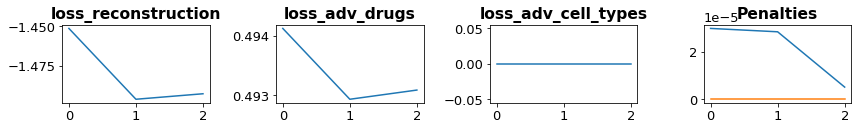

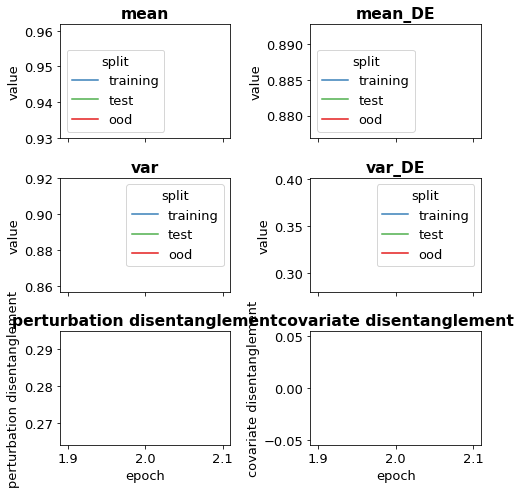

In [7]:
pretty_history = cpa.plotting.ComPertHistory(compert_api.model.history)
pretty_history.print_time()
pretty_history.plot_losses()
pretty_history.plot_metrics(epoch_min=0)